In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e6:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73290%2F8710574%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240617%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240617T050255Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D866cf53e4297446dc0a08461d3dc2b061a3deeae349329da464362599906c9266eb21108befe829b2402f671c2f475fe581d68252801b8a5e2184ea07bada5b583ed8408c24abd4625b8ec3757f4aed475f1860e3c707ecb9ad6ae4bf199ba6ce91d230042520b223d806e23c75b8b0718a6d0fd9317180037c367dbeddbb849b6dd61a9169aa4e881425283c0664f1aae6ccb17fa698b8f7ee6a83c843fb51f8d81ec28a2144a00fb8b38aad5ddd811688d6bd3c6d56bceec32bafff6cbab39fee0f706e4b35b1e7731335a654247c916d57bf3e047b7841bf002606435e0b579c022f6c01d94594a361985abd097233c0d3f2345d04204449d737c5d56c8f6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3217279 bytes downloaded
Downloaded and uncompressed: playground-series-s4e6
Data source import complete.


<h1 style="font-family:verdana;"> <center>🧑‍🎓 Student 📚 Academic Success 🏆🎯💎 Prediction 🔮</center> </h1>

<center><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdHV3djduNTMwYWF6ajMxa3d5YnIybmNncHFxc2hkcndqbmhmZjFnMCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aoGeZmWNhPkTYHXW5R/giphy.gif"></center>


<p><center style="color:#159364; font-family:cursive; font-size:20px; font-weight:600">Thanks for visiting my notebook. If you enjoy The Notebook, I kindly request that you consider upvoting to provide me with further motivation to create additional works of similar nature in the future. </center></p>

# 🧐 Overview
<div class="alert alert-block alert-info">
<p style="font-size: 20px; font-family: verdana; line-height: 1.7">The academic achievement of students is influenced by several elements, such as the choice of academic stream, socio-economic circumstances, and demographic characteristics. Their graduation or dropout from their undergraduate degree hinges on their academic success and financial situation, as well as the support they receive from their parents' educational background and career.<p>
    
<p style="font-size: 20px; font-family: verdana; line-height: 1.7">Here is a brief overview of the features that we are going to encounter and train our models on:</p>
<ul style="font-size: 20px; font-family: verdana; line-height: 1.7">
    <li><strong>Perosonal Information:</strong> Marital status, gender, age at enrollment, nationality, international status, displaces status</li>
    <li><strong>Family Background:</strong> Mother's and father's qualification and occupation</li>
    <li><strong>Application and Admission:</strong> Application mode, application order, course, admission grade</li>
    <li><strong>Academic Background:</strong> Previous qualification, previous qualification grade</li>
    <li><strong>Academic Performance:</strong> Curricular units in the 1st and 2nd semesters(credited, enrolled, evaluations, approved, grades, without evaluations)</li>
    <li><strong>Attendance and Financial Status:</strong> Daytime/evening attendance, educational special needs, debtor status, tuition fees up to data, scholarship holder</li>
    <li><strong>Economic Indicators:</strong> Unemployment rate, inflation rate, GDP</li>
</ul>
    
</div>

# 🎯 Our Goal
<div class="alert alert-block alert-info" style="font-size: 20px; font-family: verdana; line-height: 1.7">
    Our goal is to understand the data and use this to train machine learning models to predict the academinc success of students.
</div>

# 🛠️ Import Libraries

In [2]:
!pip install opentsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import openTSNE
from umap import UMAP
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'umap'

# 💾 Import Data

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv", index_col="id")
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv", index_col="id")

In [5]:
target = "Target"

In [6]:
features = test.columns.to_list()

In [7]:
categorical_features = train.select_dtypes(include=int).columns.to_list()
continuous_features = train.select_dtypes(include=float).columns.to_list()

In [8]:
continuous_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [9]:
discrete_features = [col for col in categorical_features if col.startswith("Curricular")] + ["Age at enrollment"]
discrete_features

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Age at enrollment']

In [10]:
categorical_features = list(np.setdiff1d(categorical_features, discrete_features))
categorical_features

['Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Debtor',
 'Displaced',
 'Educational special needs',
 "Father's occupation",
 "Father's qualification",
 'Gender',
 'International',
 'Marital status',
 "Mother's occupation",
 "Mother's qualification",
 'Nacionality',
 'Previous qualification',
 'Scholarship holder',
 'Tuition fees up to date']

In [11]:
train.shape

(76518, 37)

In [12]:
test.shape

(51012, 36)

# 📊 EDA 📈

## 🔢 Statistical Summary

In [13]:
def customDescription(df: pd.DataFrame, numeric_only: bool = True):
    if numeric_only:
        df = df.select_dtypes(include=np.number)
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)

    if numeric_only:
        desc["skew"] = df.skew()
        desc["kurtosis"] = df.kurtosis()
    desc = desc.round(2)
    return desc

### Summary of training data

In [14]:
customDescription(train)

type  count  nunique  \
Marital status                                    int64  76518        6   
Application mode                                  int64  76518       22   
Application order                                 int64  76518        8   
Course                                            int64  76518       19   
Daytime/evening attendance                        int64  76518        2   
Previous qualification                            int64  76518       21   
Previous qualification (grade)                  float64  76518      110   
Nacionality                                       int64  76518       18   
Mother's qualification                            int64  76518       35   
Father's qualification                            int64  76518       39   
Mother's occupation                               int64  76518       40   
Father's occupation                               int64  76518       56   
Admission grade                                 float64  76518      668   
Displaced                                         int64  76518        2   
Educational special needs                         int64  76518        2   
Debtor                                            int64  76518        2   
Tuition fees up to date                           int64  76518        2   
Gender                                            int64  76518        2   
Scholarship holder                                int64  76518        2   
Age at enrollment                                 int64  76518       46   
International                                     int64  76518        2   
Curricular units 1st sem (credited)               int64  76518       21   
Curricular units 1st sem (enrolled)               int64  76518       24   
Curricular units 1st sem (evaluations)            int64  76518       36   
Curricular units 1st sem (approved)               int64  76518       23   
Curricular units 1st sem (grade)                float64  76518     1206   
Curricular units 1st sem (without evaluations)    int64  76518       12   
Curricular units 2nd sem (credited)               int64  76518       20   
Curricular units 2nd sem (enrolled)               int64  76518       22   
Curricular units 2nd sem (evaluations)            int64  76518       31   
Curricular units 2nd sem (approved)               int64  76518       21   
Curricular units 2nd sem (grade)                float64  76518     1234   
Curricular units 2nd sem (without evaluations)    int64  76518       11   
Unemployment rate                               float64  76518       11   
Inflation rate                                  float64  76518       13   
GDP                                             float64  76518       11   

                                                %unique  null  %null     mean  \
Marital status                                     0.01     0    0.0     1.11   
Application mode                                   0.03     0    0.0    16.05   
Application order                                  0.01     0    0.0     1.64   
Course                                             0.02     0    0.0  9001.29   
Daytime/evening attendance                         0.00     0    0.0     0.92   
Previous qualification                             0.03     0    0.0     3.66   
Previous qualification (grade)                     0.14     0    0.0   132.38   
Nacionality                                        0.02     0    0.0     1.23   
Mother's qualification                             0.05     0    0.0    19.84   
Father's qualification                             0.05     0    0.0    23.43   
Mother's occupation                                0.05     0    0.0     8.58   
Father's occupation                                0.07     0    0.0     8.88   
Admission grade                                    0.87     0    0.0   125.36   
Displaced                                          0.00     0    0.0     0.57   
Educational special needs                          0.00     

### Summary of test data

In [15]:
customDescription(test)

type  count  nunique  \
Marital status                                    int64  51012        6   
Application mode                                  int64  51012       20   
Application order                                 int64  51012        8   
Course                                            int64  51012       21   
Daytime/evening attendance                        int64  51012        2   
Previous qualification                            int64  51012       20   
Previous qualification (grade)                  float64  51012      108   
Nacionality                                       int64  51012       18   
Mother's qualification                            int64  51012       32   
Father's qualification                            int64  51012       36   
Mother's occupation                               int64  51012       38   
Father's occupation                               int64  51012       49   
Admission grade                                 float64  51012      653   
Displaced                                         int64  51012        2   
Educational special needs                         int64  51012        2   
Debtor                                            int64  51012        2   
Tuition fees up to date                           int64  51012        2   
Gender                                            int64  51012        2   
Scholarship holder                                int64  51012        2   
Age at enrollment                                 int64  51012       46   
International                                     int64  51012        2   
Curricular units 1st sem (credited)               int64  51012       21   
Curricular units 1st sem (enrolled)               int64  51012       23   
Curricular units 1st sem (evaluations)            int64  51012       34   
Curricular units 1st sem (approved)               int64  51012       23   
Curricular units 1st sem (grade)                float64  51012     1121   
Curricular units 1st sem (without evaluations)    int64  51012       11   
Curricular units 2nd sem (credited)               int64  51012       19   
Curricular units 2nd sem (enrolled)               int64  51012       23   
Curricular units 2nd sem (evaluations)            int64  51012       30   
Curricular units 2nd sem (approved)               int64  51012       21   
Curricular units 2nd sem (grade)                float64  51012     1155   
Curricular units 2nd sem (without evaluations)    int64  51012       10   
Unemployment rate                               float64  51012       12   
Inflation rate                                  float64  51012       12   
GDP                                             float64  51012       10   

                                                %unique  null  %null     mean  \
Marital status                                     0.01     0    0.0     1.11   
Application mode                                   0.04     0    0.0    16.07   
Application order                                  0.02     0    0.0     1.65   
Course                                             0.04     0    0.0  9026.30   
Daytime/evening attendance                         0.00     0    0.0     0.92   
Previous qualification                             0.04     0    0.0     3.64   
Previous qualification (grade)                     0.21     0    0.0   132.33   
Nacionality                                        0.04     0    0.0     1.20   
Mother's qualification                             0.06     0    0.0    19.91   
Father's qualification                             0.07     0    0.0    23.54   
Mother's occupation                                0.07     0    0.0     8.51   
Father's occupation                                0.10     0    0.0     8.79   
Admission grade                                    1.28     0    0.0   125.42   
Displaced                                          0.00     0    0.0     0.57   
Educational special needs                          0.00     

### Duplicate Check

In [16]:
train.duplicated().sum()

0

# 🚚 Feature Distribution

## Categorical Features

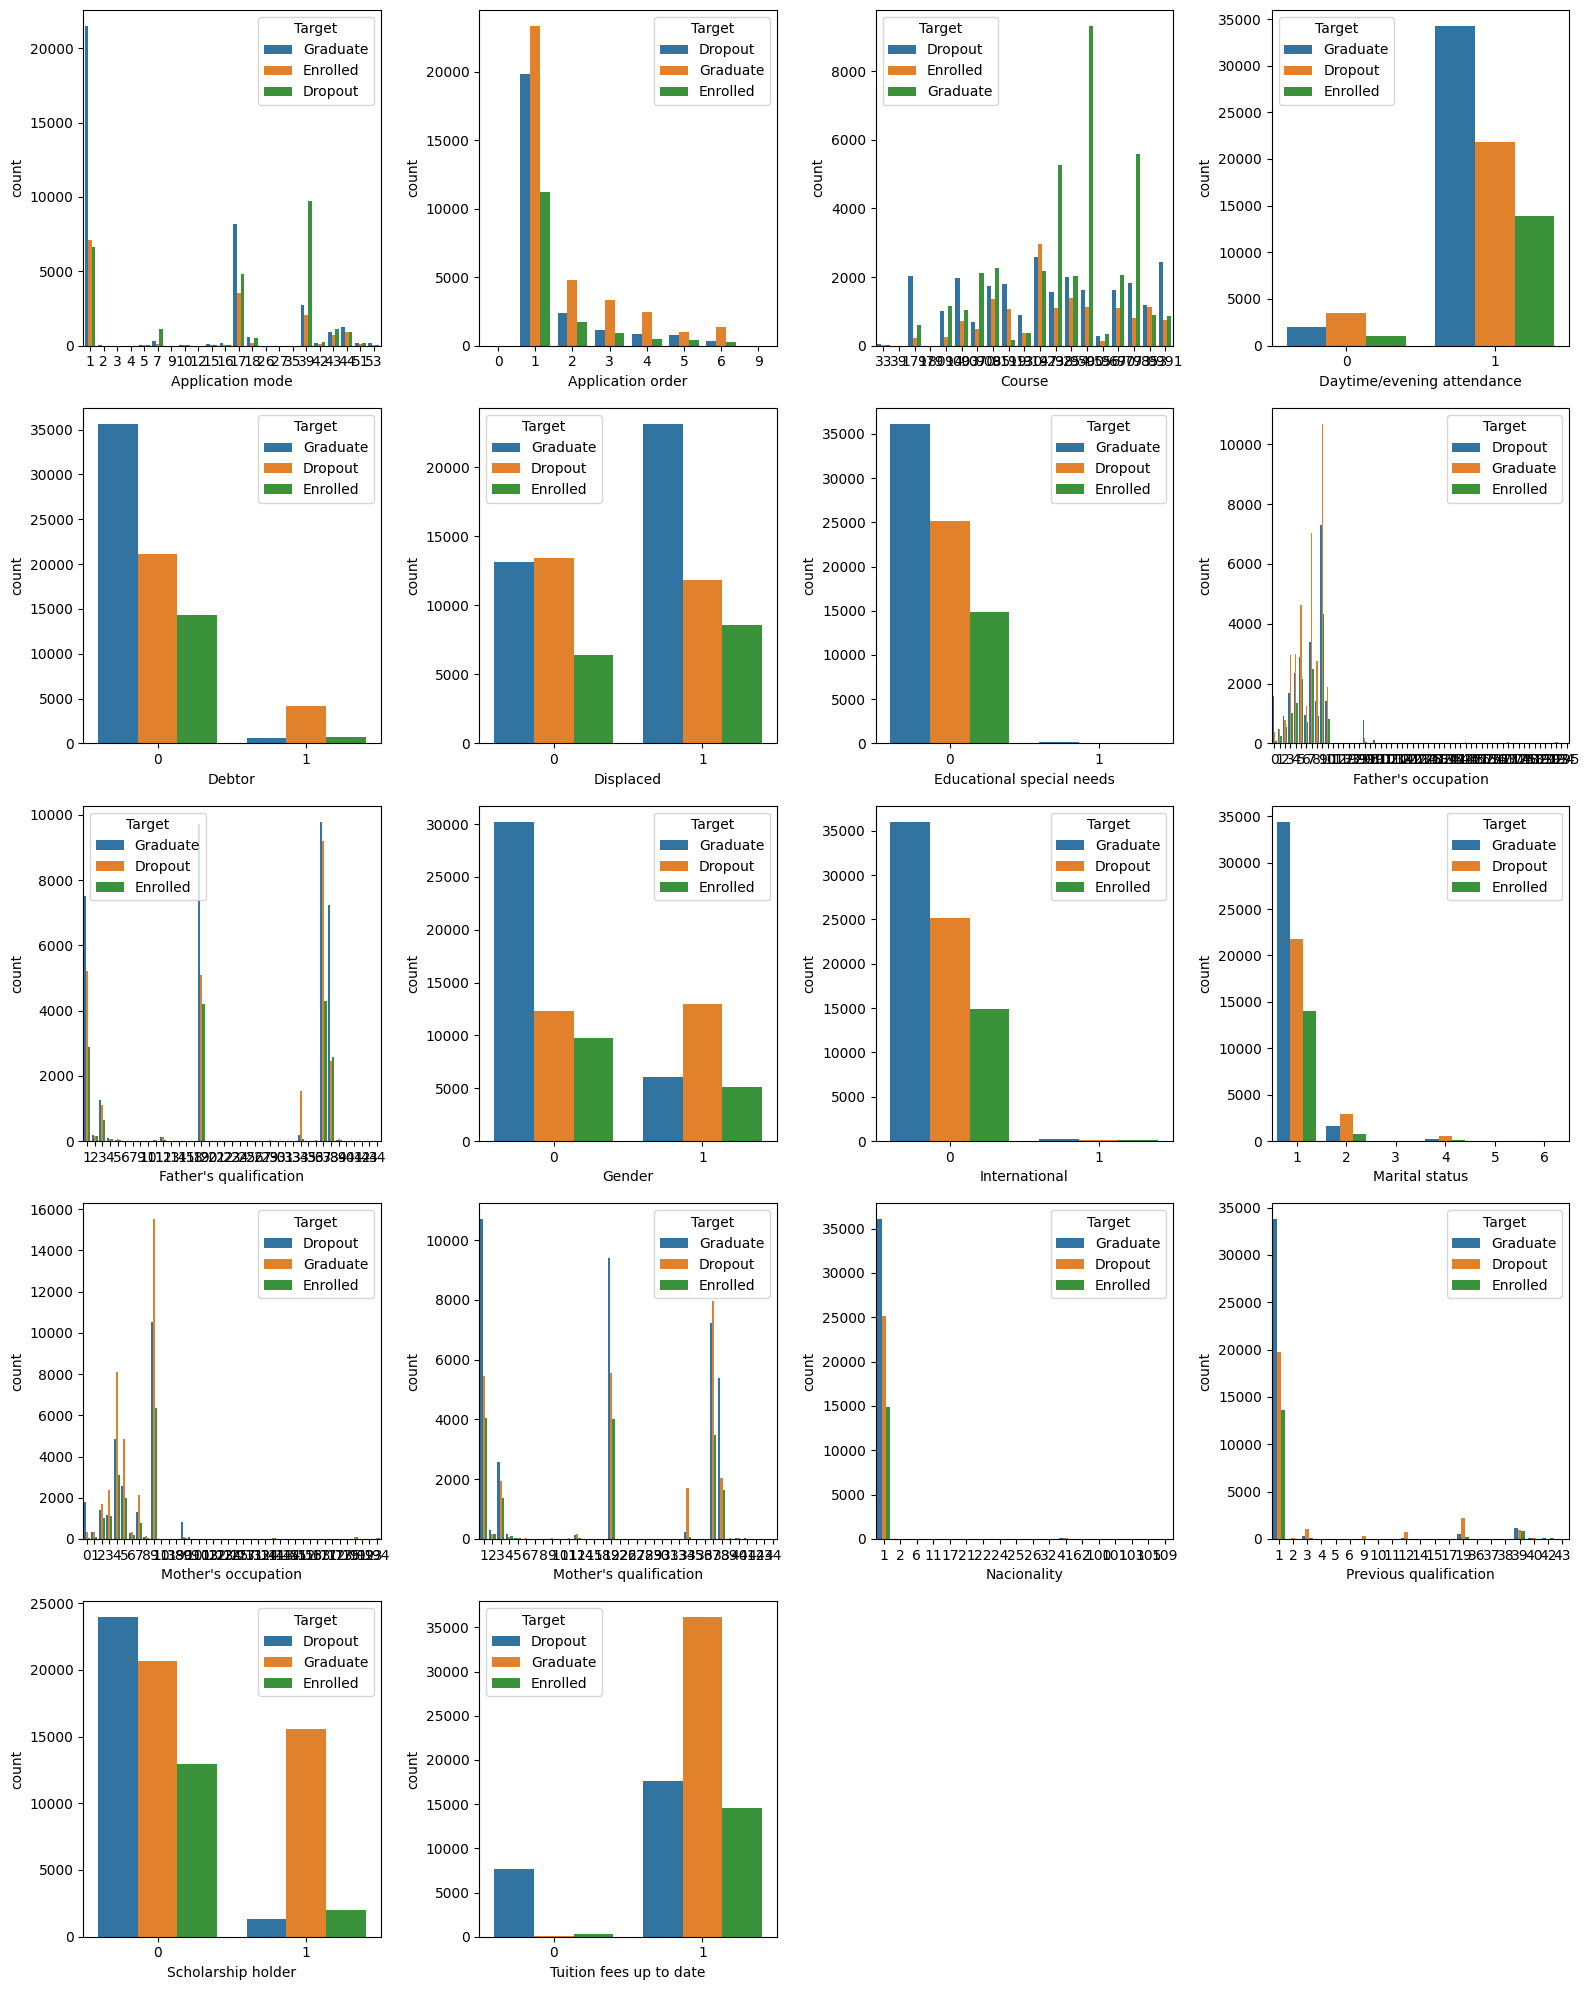

In [17]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=train, x=col, hue=target)
plt.tight_layout()
plt.show()

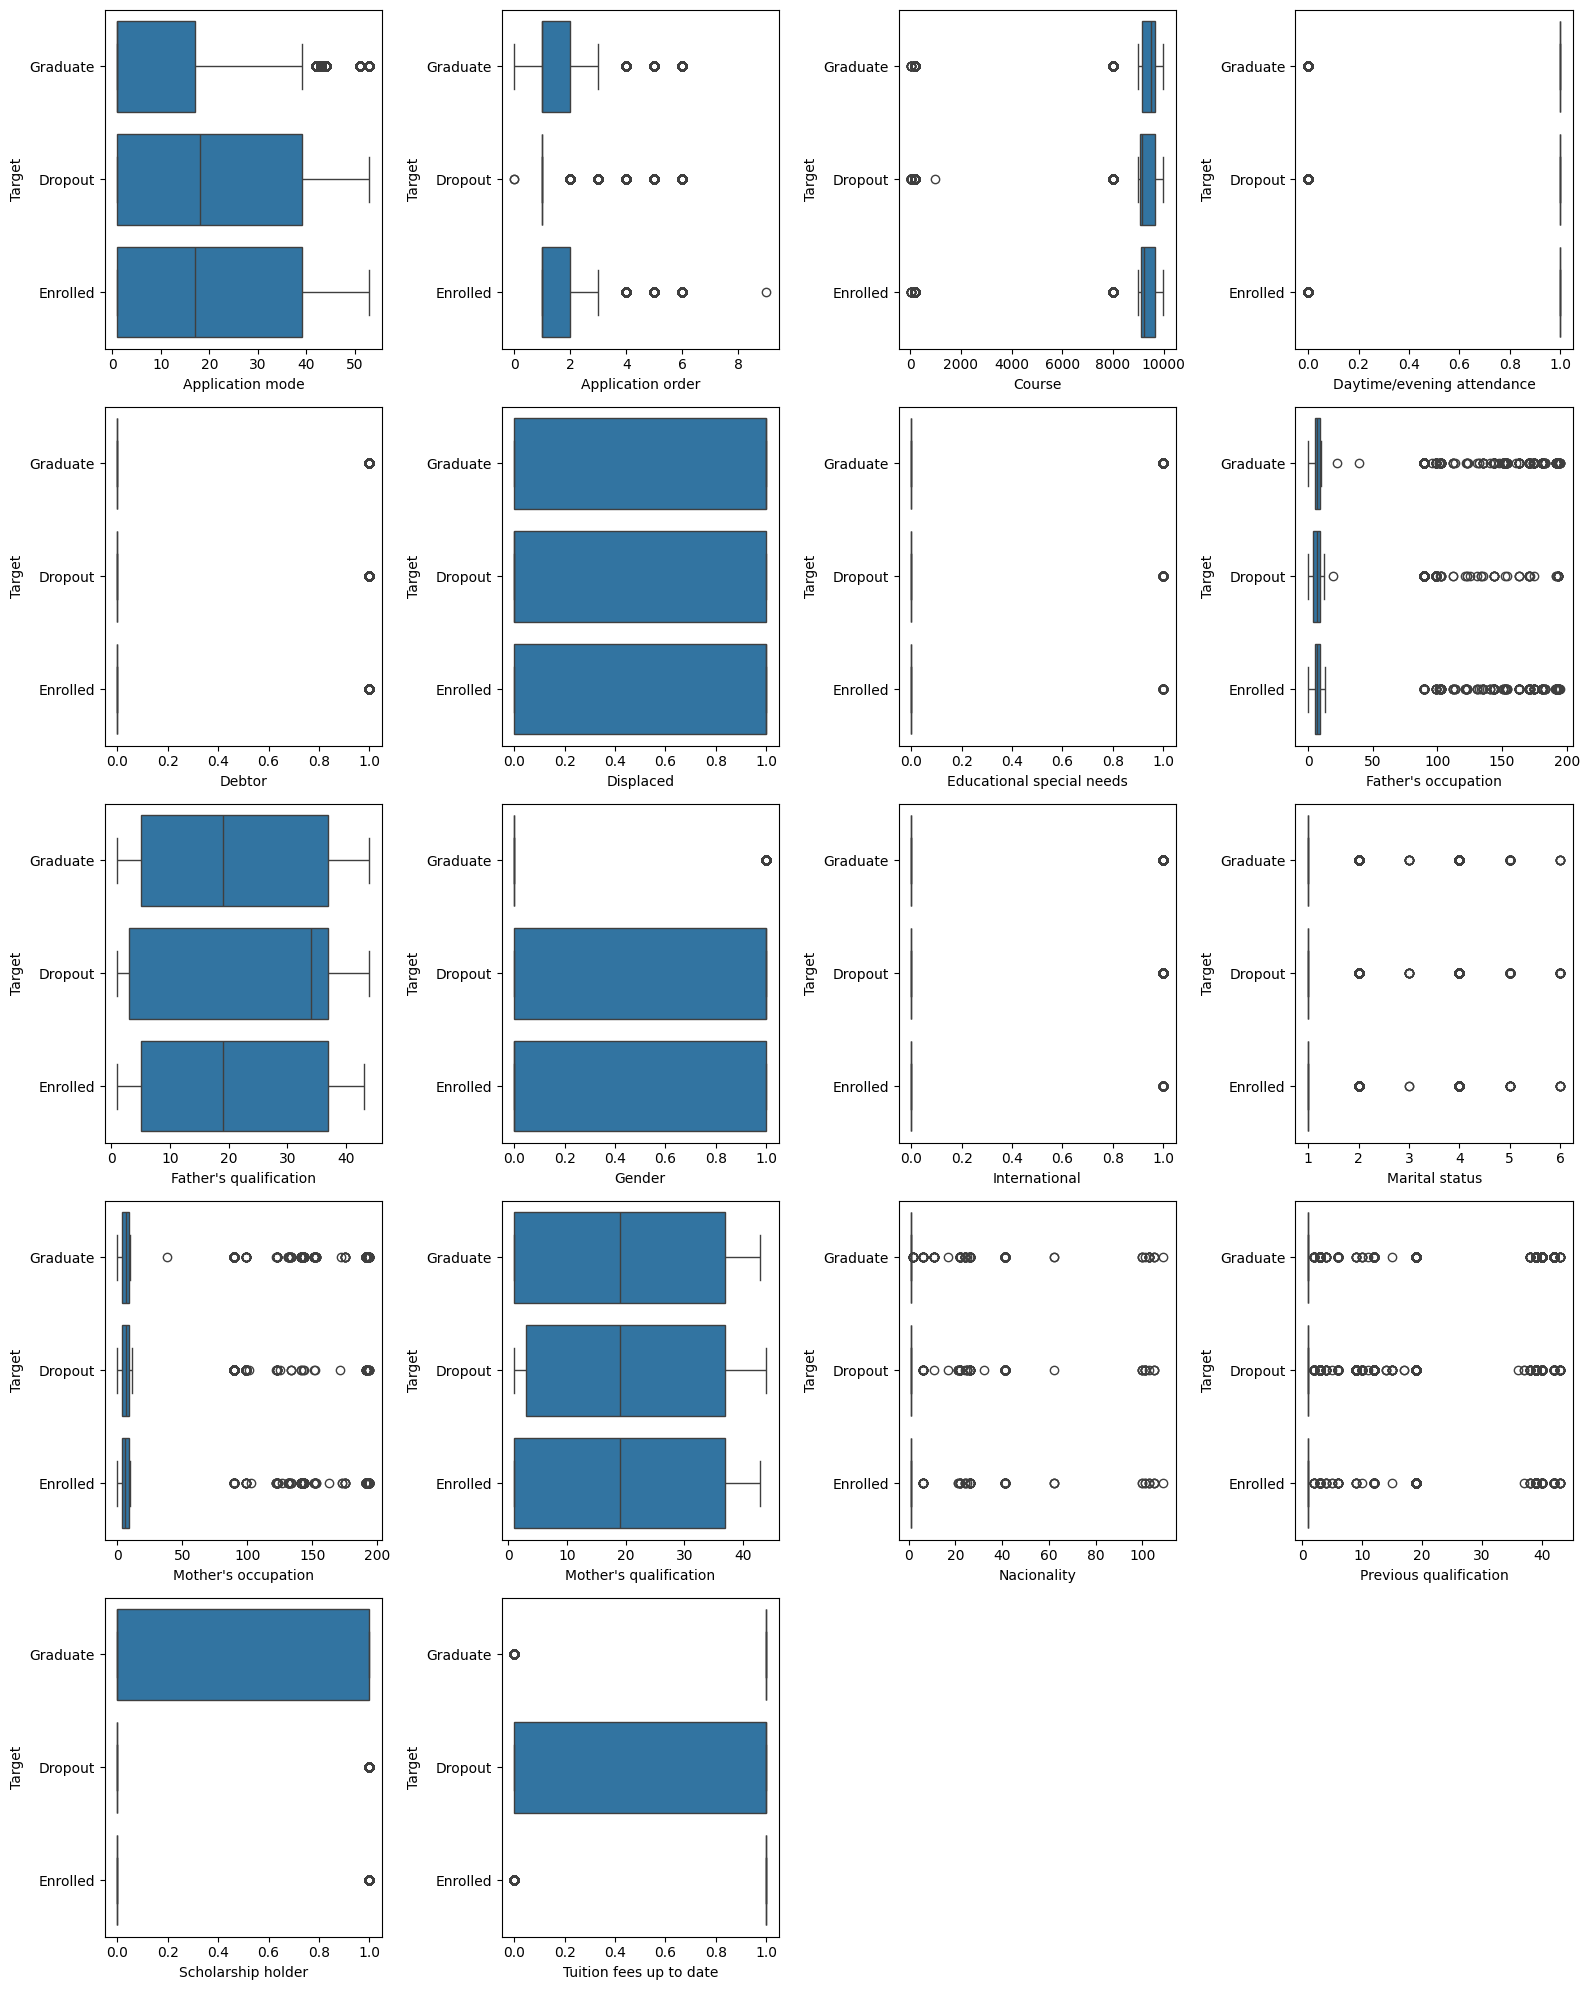

In [18]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=train, x=col, y=target)
plt.tight_layout()
plt.show()

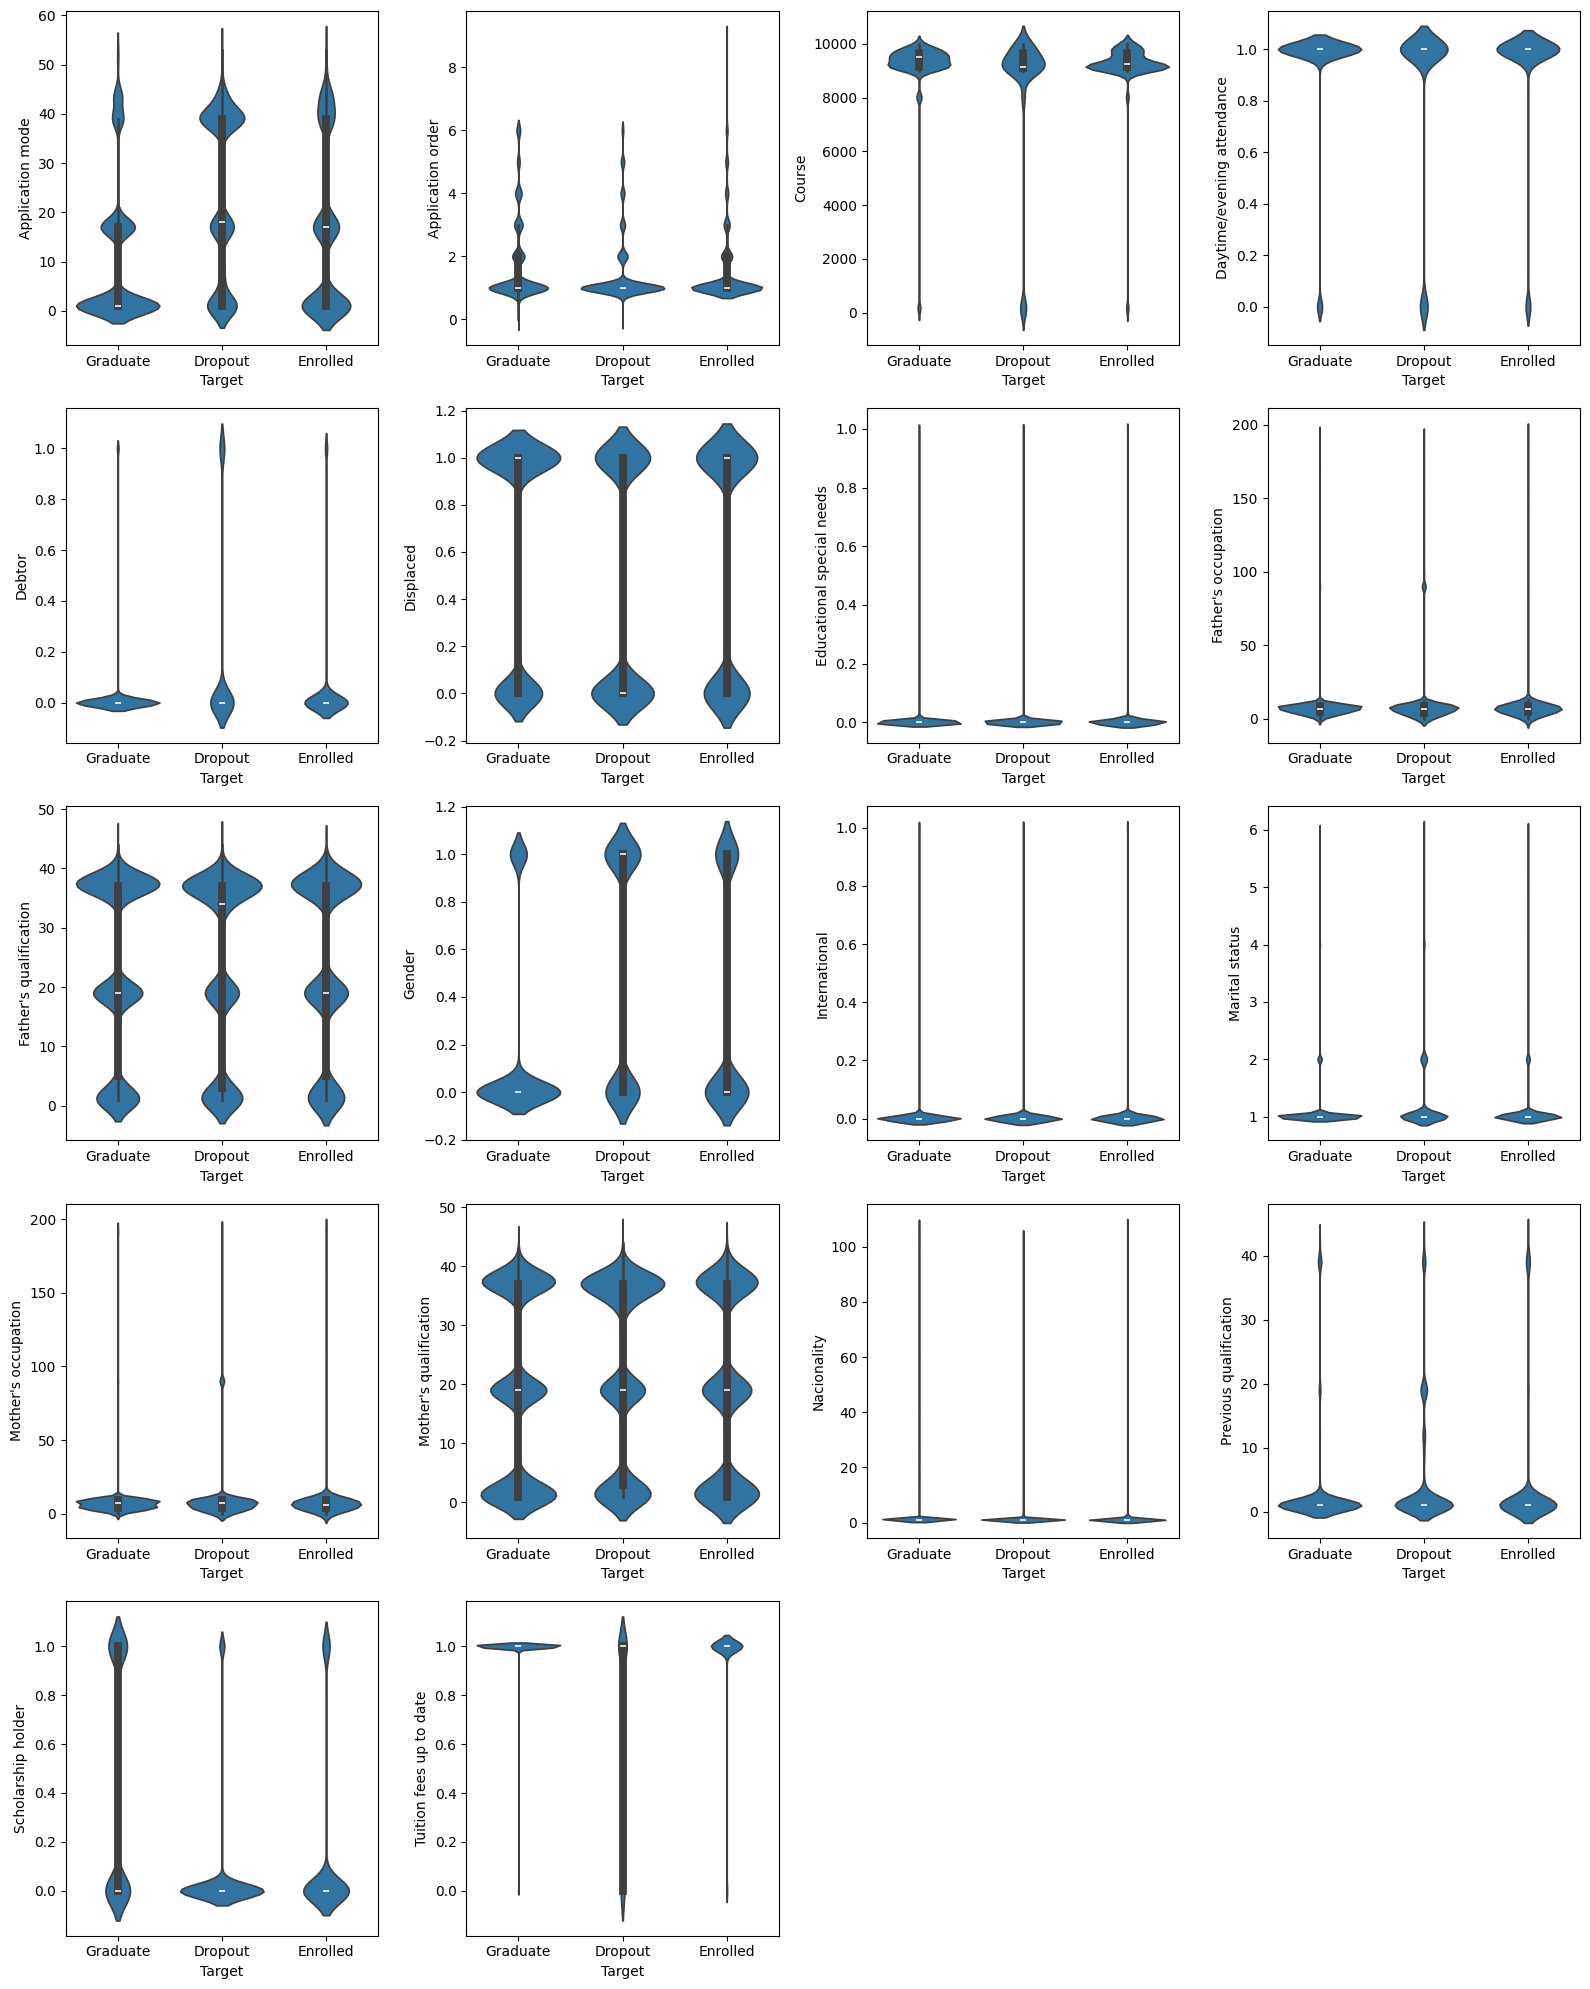

In [19]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(5, 4, i+1)
    sns.violinplot(data=train, x=target, y=col)
plt.tight_layout()
plt.show()

## Discrete Nemeric Features

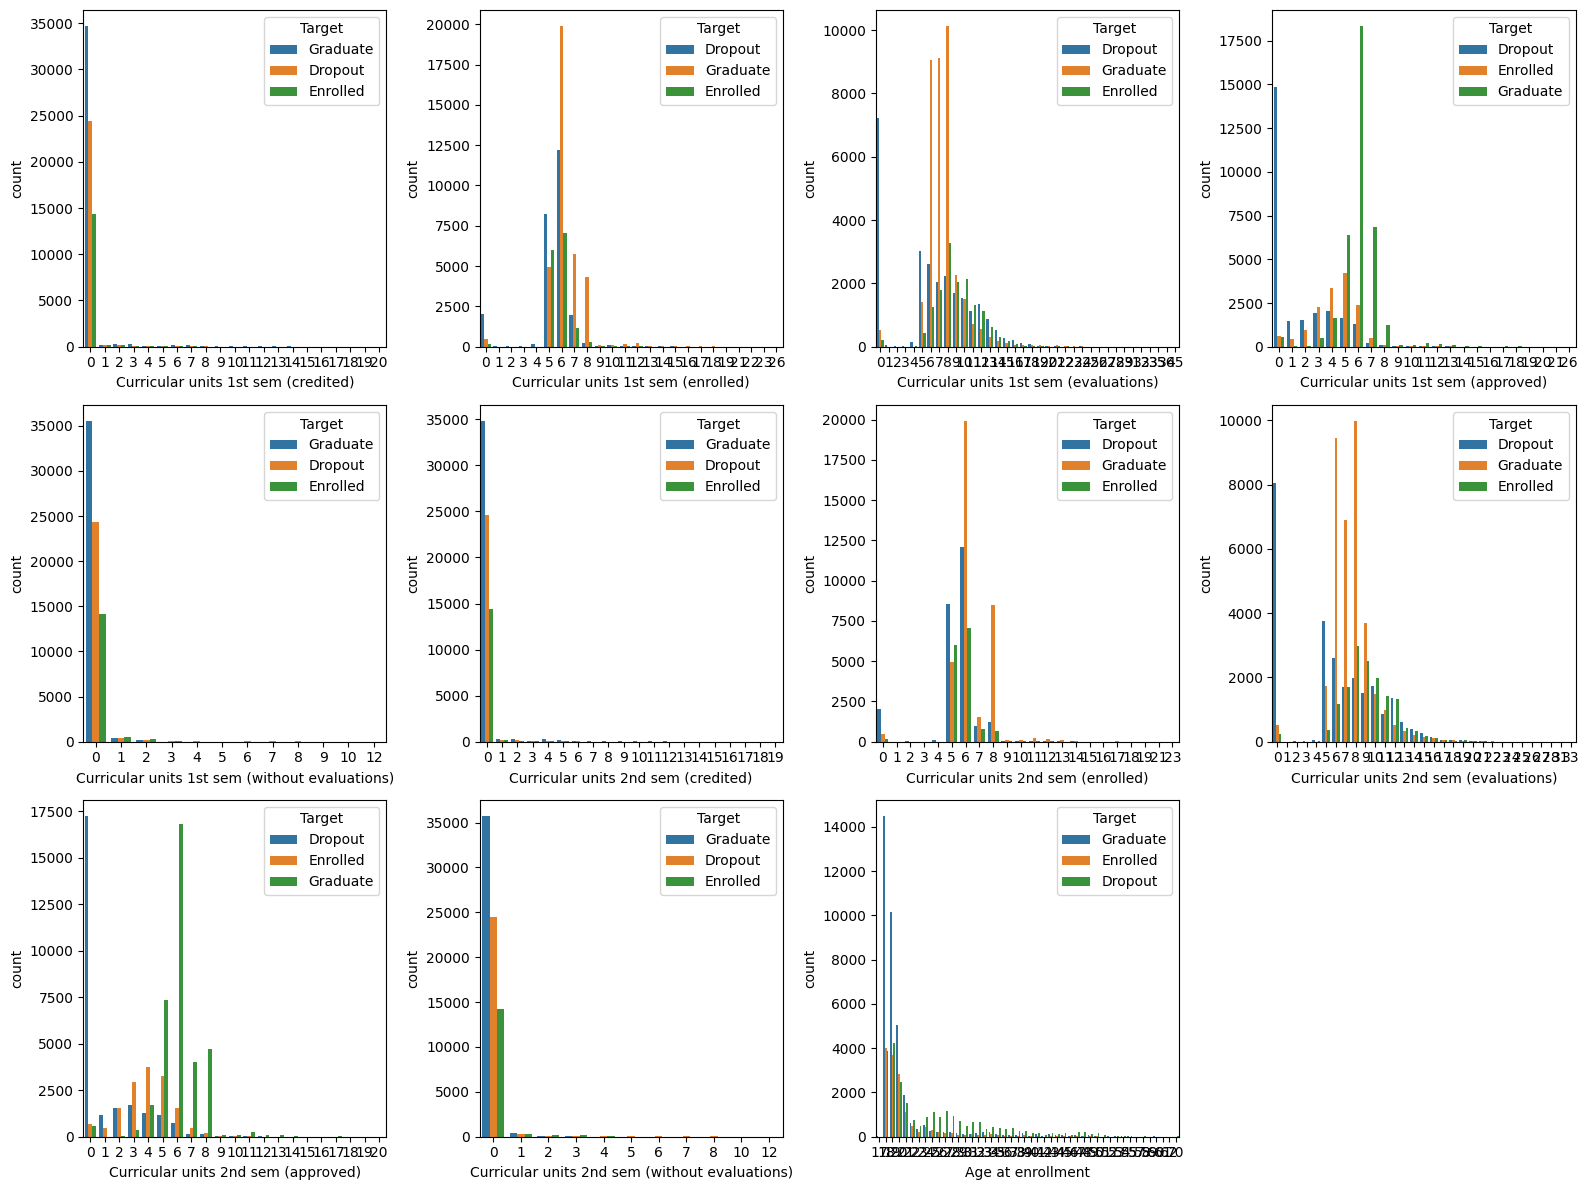

In [20]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(discrete_features):
    plt.subplot(3, 4, i+1)
    sns.countplot(data=train, x=col, hue=target)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(discrete_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=train, x=col, y=target)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(discrete_features):
    plt.subplot(3, 4, i+1)
    sns.violinplot(data=train, x=target, y=col)
plt.tight_layout()
plt.show()

## Continuous Numerical Features

In [ ]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=train, x=col, hue=target)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=train, x=col, y=target)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 4, i+1)
    sns.violinplot(data=train, x=target, y=col)
plt.tight_layout()
plt.show()

# 🎯 Target Distribution

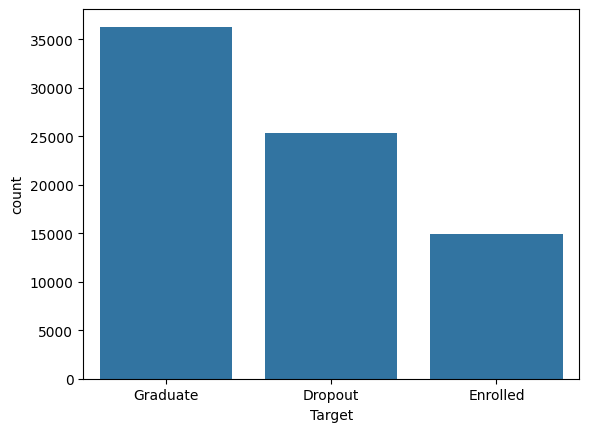

In [21]:
sns.countplot(data=train, x=target)
plt.show()

# Encoding Categorical Variables

<div class="alert alert-block alert-success" style="padding: 20px;">
    <p style="font-size:20px; font-family:verdana; line-height:1.7">
        💡 We first need to encode our target variable, which is a multiclass object-type variable.
        Additionally, some of the feature variables are as follows:
    </p>
    <ul style="font-size:20px; font-family:verdana; line-height:1.7">
       <li>Application mode</li>
       <li>Course</li>
       <li>Previous qualification</li>
       <li>Nacionality</li>
       <li>Mother's qualification</li>
       <li>Father's qualification</li>
       <li>Mother's occupation</li>
       <li>Father's occupation</li>
    </ul>
    <p style="font-size:20px; font-family:verdana; line-height:1.7">
        These are required to be encoded. Though they are in integer format, the values are not on specific scales.
    </p>
</div>

In [22]:
lab_enc = LabelEncoder()
train[target] = lab_enc.fit_transform(train[target])

In [23]:
sp_cols = [
    "Application mode",
    "Course",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]


def nunique(x):
    return len(np.unique(x))


unique_count = {}
unique_count["columns"] = sp_cols
unique_count["in_training"] = [nunique(train[col]) for col in sp_cols]
unique_count["training + test"] = [nunique(np.concatenate([train[col], test[col]])) for col in sp_cols]

pd.DataFrame(unique_count)

columns  in_training  training + test
0        Application mode           22               24
1                  Course           19               23
2  Previous qualification           21               22
3             Nacionality           18               19
4  Mother's qualification           35               37
5  Father's qualification           39               41
6     Mother's occupation           40               45
7     Father's occupation           56               58

<div class="alert alert-block alert-warning" style="font-size:20px; font-family:verdana; line-height:1.7">
🚨 When we merge the training and test datasets, we get additional classes, as seen in the output. Thus, if we train our model solely on the categories contained in the training dataset, we will be unable to accurately classify the student's academic accomplishment. As a result, in order to encode these variables, we must also use the training dataset.
</div>

In [24]:
lab_encoder = LabelEncoder()
for col in sp_cols:
    lab_encoder.fit(np.unique(np.concatenate([train[col], test[col]])))
    train[col] = lab_encoder.transform(train[col])
    test[col] = lab_encoder.transform(test[col])

# 🤝 Correlation

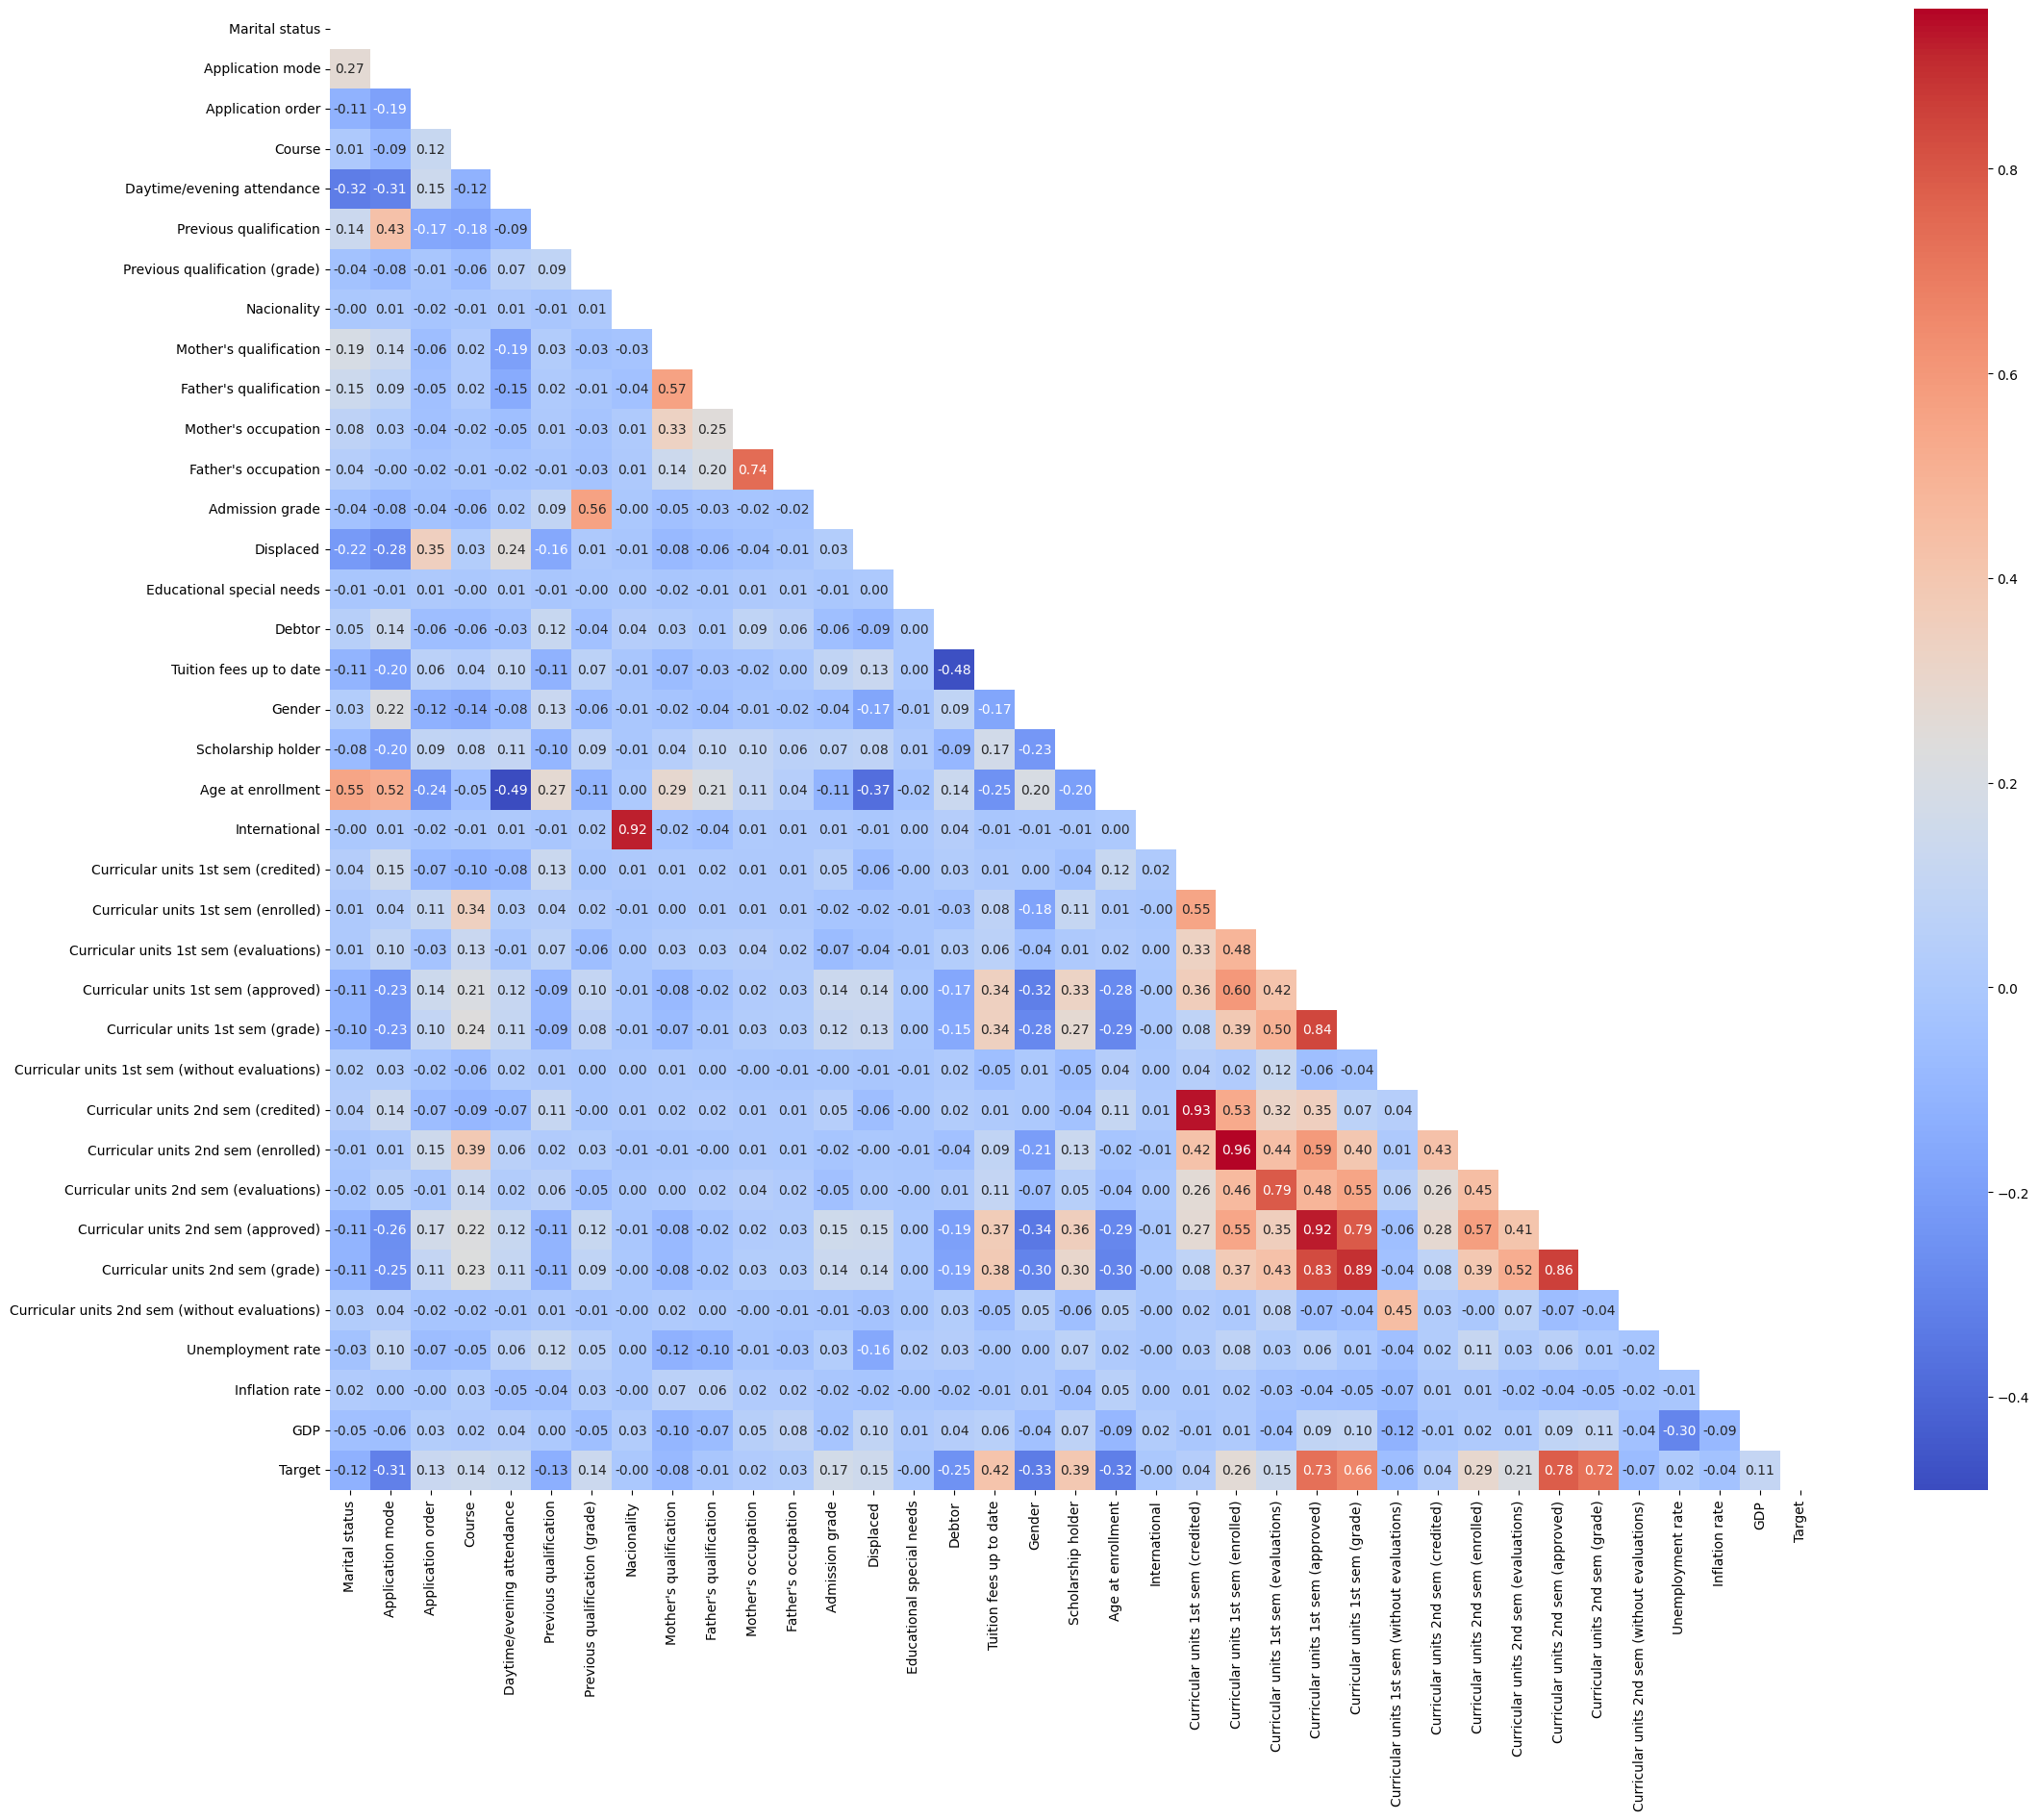

In [25]:
cor_mat = train.corr(method="pearson")

mask = np.triu(np.ones_like(cor_mat))

plt.figure(figsize=(25, 20))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.show()

In [26]:
X = train.drop(target, axis=1)
y = train[target]

# Dimensionality Reduction

## PCA

<div class="alert alert-block alert-info" style="font-size: 20px; font-family: verdana; line-height: 1.7">
   ℹ️ Principal Component Analysis or PCA is a linear dimensionality reduction algorithm. In this technique, data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.
</div>

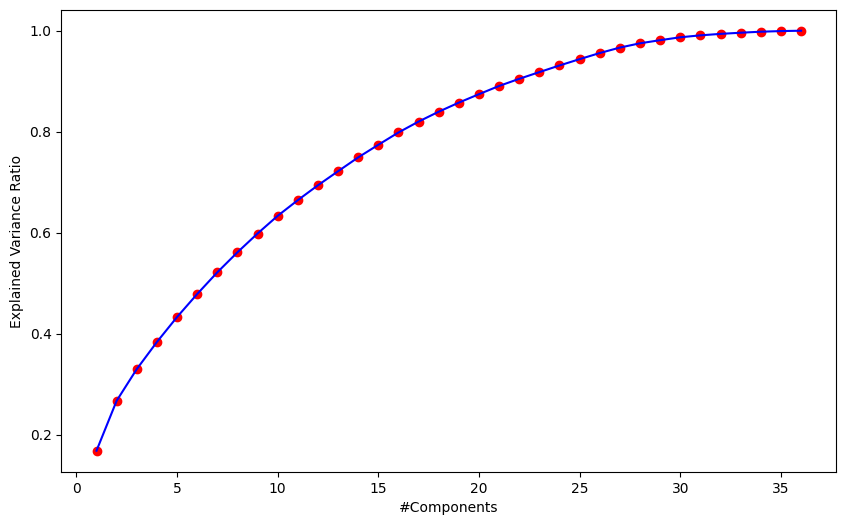

In [27]:
pca = PCA()

pca_pipe = make_pipeline(StandardScaler(), pca)

pca_pipe.fit(X)
explained_variance_ratio = np.cumsum(pca_pipe[-1].explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)+1), explained_variance_ratio, "b-")
plt.scatter(range(1, len(X.columns)+1), explained_variance_ratio, c="red")
plt.xlabel("#Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

<div class="alert alert-block alert-warning" style="font-size:20px; font-family:verdana; line-height:1.7">
<strong>We can preserve 99% of variance with 31 components if we use PCA.</strong>
</div>

## t-SNE

<div class="alert alert-block alert-info" style="font-size: 20px; font-family: verdana; line-height: 1.7;">
    <strong>t-distributed stochastic neighbor embedding (t-SNE)</strong> is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It is a nonlinear dimensionality reduction technique for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.
</div>

In [28]:
def plot(x, **kwargs):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=3, **kwargs)

In [29]:
%%time

embedding_standard = openTSNE.TSNE(
    perplexity=30,
    initialization="random",
    metric="euclidean",
    n_jobs=8,
    random_state=42,
).fit(np.array(X))

CPU times: user 4min 5s, sys: 5.16 s, total: 4min 10s
Wall time: 2min 51s


Text(0.5, 1.0, 'Standard t-SNE')

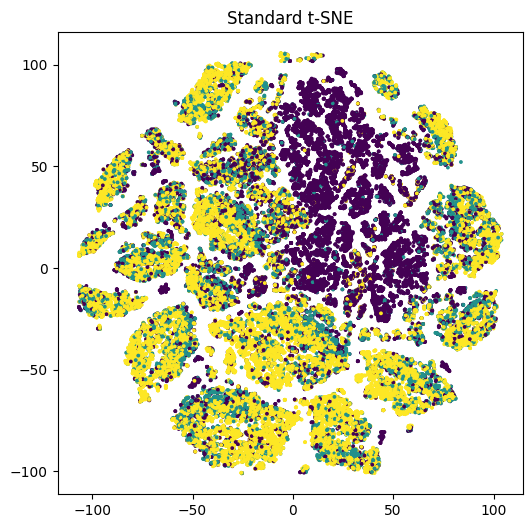

In [30]:
plt.figure(figsize=(6, 6))
plot(embedding_standard)
plt.title("Standard t-SNE")

In [31]:
%%time
embedding_pca = openTSNE.TSNE(
    perplexity=30,
    initialization="pca",
    metric="euclidean",
    n_jobs=8,
    random_state=42,
).fit(np.array(X))

CPU times: user 4min 5s, sys: 6.4 s, total: 4min 12s
Wall time: 2min 53s


Text(0.5, 1.0, 'PCA initialization')

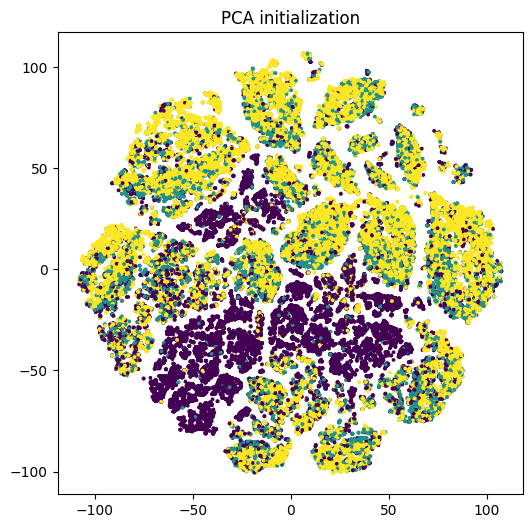

In [33]:
plt.figure(figsize=(6, 6))
plot(embedding_pca)
plt.title("PCA initialization")

In [34]:
%%time
embedding_cosine = openTSNE.TSNE(
    perplexity=30,
    initialization="random",
    metric="cosine",
    n_jobs=8,
    random_state=3,
).fit(np.array(X))

CPU times: user 4min 26s, sys: 5.56 s, total: 4min 32s
Wall time: 3min 3s


Text(0.5, 1.0, 'Cosine distance')

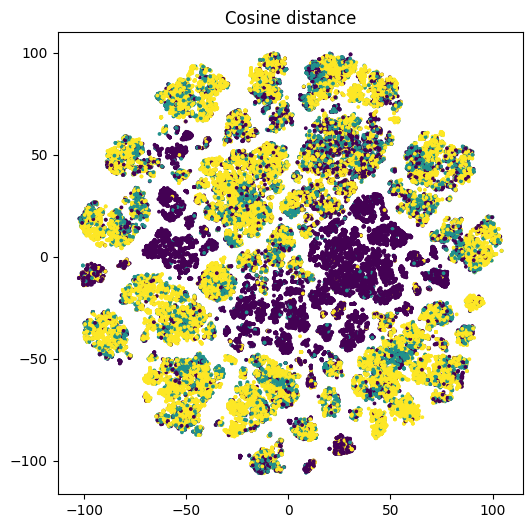

In [35]:
plt.figure(figsize=(6, 6))
plot(embedding_cosine)
plt.title("Cosine distance")

In [36]:
%%time
embedding_pca_cosine = openTSNE.TSNE(
    perplexity=30,
    initialization="pca",
    metric="cosine",
    n_jobs=8,
    random_state=3,
).fit(np.array(X))

CPU times: user 4min 23s, sys: 6.24 s, total: 4min 29s
Wall time: 3min 2s


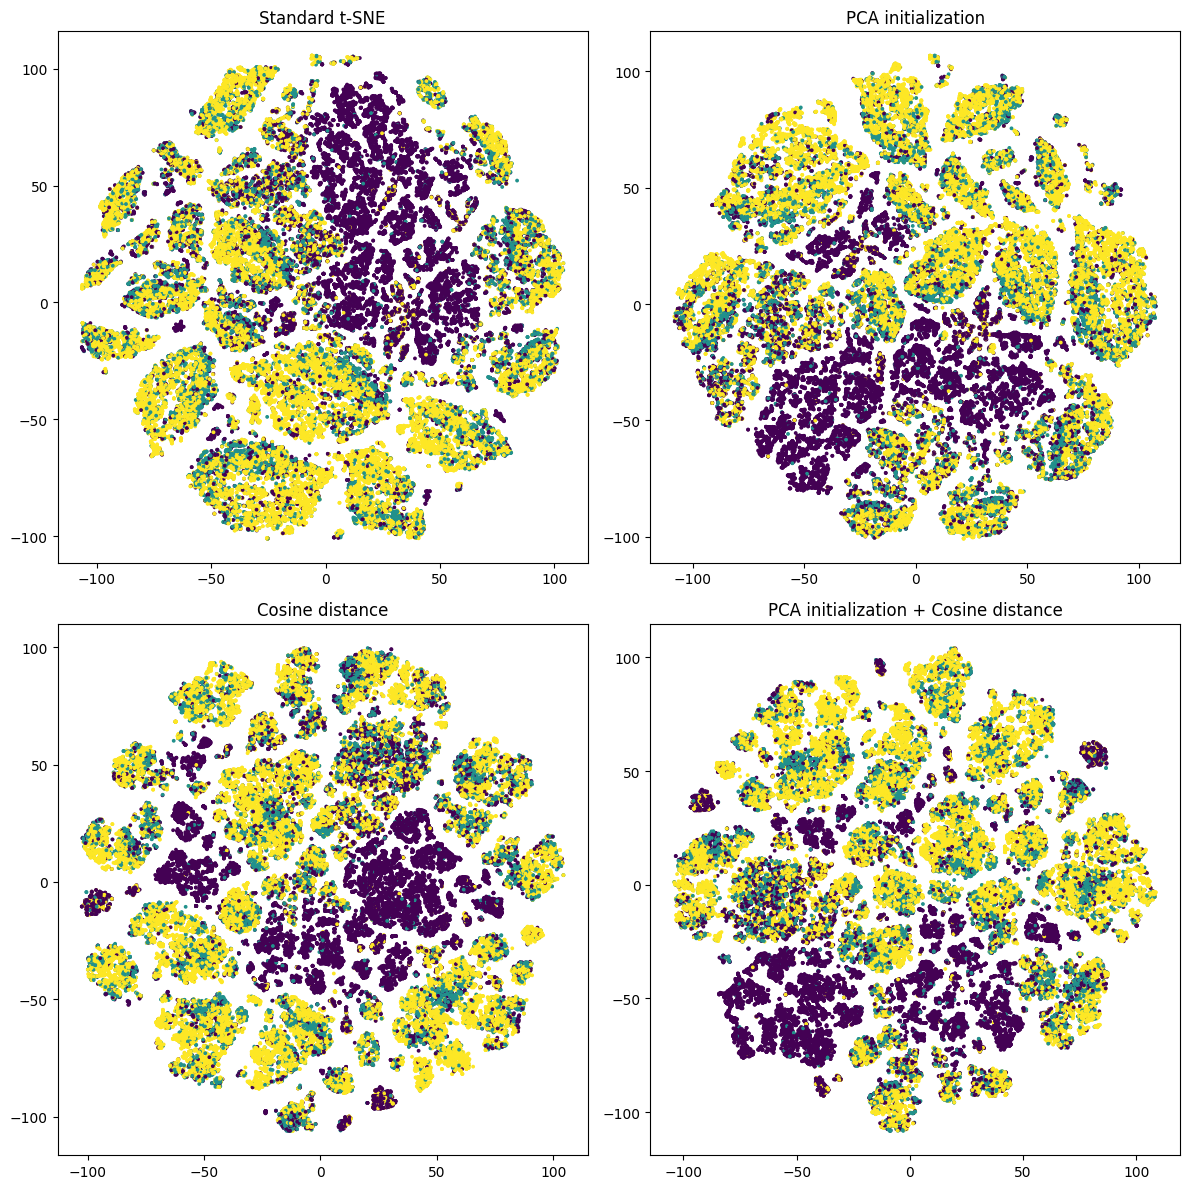

In [37]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plot(embedding_standard)
plt.title("Standard t-SNE")

plt.subplot(2, 2, 2)
plot(embedding_pca)
plt.title("PCA initialization")

plt.subplot(2, 2, 3)
plot(embedding_cosine)
plt.title("Cosine distance")

plt.subplot(2, 2, 4)
plot(embedding_pca_cosine)
plt.title("PCA initialization + Cosine distance")

plt.tight_layout()
plt.show()

## UMAP

<div class="alert alert-block alert-info" style="padding: 20px">
<p style="font-size:20px; font-family:verdana; line-height:1.7">Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.</p>
    
<p style="font-size:20px; font-family:verdana; line-height:1.7">The algorithm is founded on three assumptions about the data</p>
<ol style="font-size:20px; font-family:verdana; line-height:1.7">
    <li>The data is uniformly distributed on Riemannian manifold;</li>
    <li>The Riemannian metric is locally constant (or can be approximated as such);</li>
    <li>The manifold is locally connected.</li>
</ol>
<p style="font-size:20px; font-family:verdana; line-height:1.7">From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.</p>
</div>

In [ ]:
train_sample = train.sample(5000)

reducer = UMAP()

res = reducer.fit_transform(train_sample.drop(target, axis=1))

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(res[:, 0], res[:, 1], c=train_sample[target], s=5)
plt.title("UMAP")
plt.show()

<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana; line-height:1.7">
    We can observe some clusters in both t-SNE and UMAP reduction methods. This implies that we can employ them for dimensionality reduction.
</div>

# Feature Selection

## Mutual Information Score

<div class="alert alert-block alert-info" style="padding: 20px">
    <p style="font-size:20px; font-family:verdana; line-height:1.7">
        <strong>Mutual Information Score</strong> helps us to understand how much the feature variables tell us about the target variable.
    </p>
    <p style="font-size:20px; font-family:verdana; line-height:1.7">
        Since our data have a lot of feature variables, we can take help of this to remove redundant feature variables. This may improve the proformance of our model.
    </p>
</div>

In [38]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

In [39]:
mi_scores = mi_score_maker(X, y, discrete_features)

mi_scores

Features    Scores
0              Curricular units 2nd sem (approved)  0.478434
1                 Curricular units 2nd sem (grade)  0.412688
2              Curricular units 1st sem (approved)  0.404898
3                 Curricular units 1st sem (grade)  0.364054
4           Curricular units 2nd sem (evaluations)  0.195230
5           Curricular units 1st sem (evaluations)  0.186579
6                                           Course  0.115707
7                                  Admission grade  0.103492
8                          Tuition fees up to date  0.102676
9                                Age at enrollment  0.096284
10                  Previous qualification (grade)  0.090496
11                              Scholarship holder  0.090018
12                                Application mode  0.084218
13             Curricular units 2nd sem (enrolled)  0.077892
14             Curricular units 1st sem (enrolled)  0.075764
15                                          Gender  0.055300
16                          Previous qualification  0.034926
17                                          Debtor  0.032437
18                          Mother's qualification  0.030472
19                          Father's qualification  0.029162
20                             Mother's occupation  0.028277
21                             Father's occupation  0.025860
22                               Application order  0.013628
23                               Unemployment rate  0.013471
24                                             GDP  0.011755
25                                       Displaced  0.011359
26                                  Inflation rate  0.011107
27                                  Marital status  0.010658
28                      Daytime/evening attendance  0.008094
29  Curricular units 2nd sem (without evaluations)  0.005726
30  Curricular units 1st sem (without evaluations)  0.004211
31             Curricular units 1st sem (credited)  0.001621
32             Curricular units 2nd sem (credited)  0.001491
33                                     Nacionality  0.000655
34                                   International  0.000004
35                       Educational special needs  0.000002

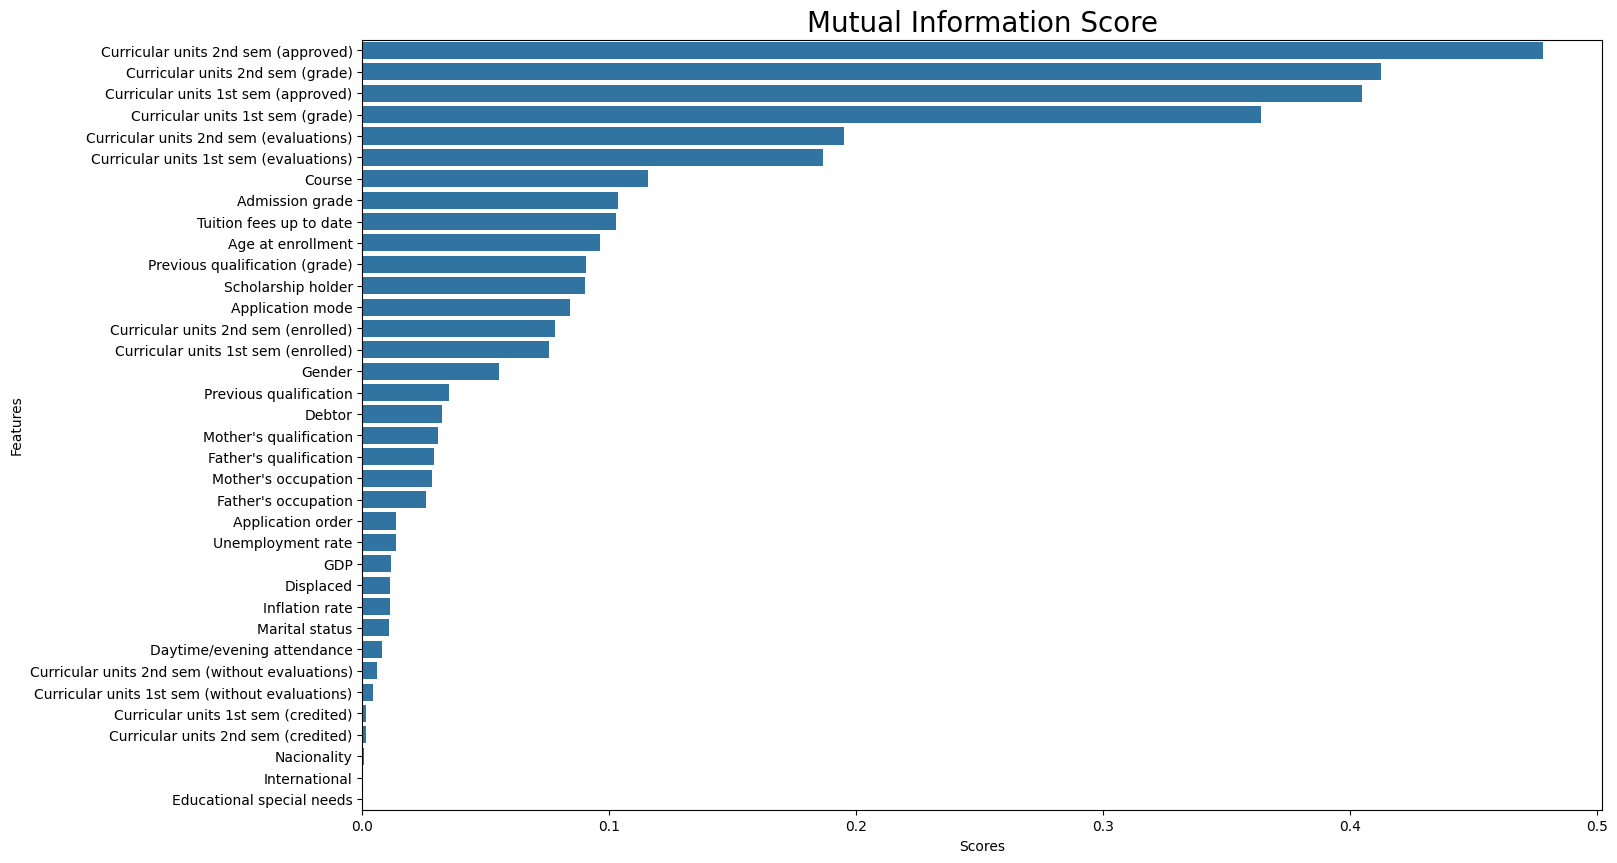

In [40]:
plt.figure(figsize=(16, 10))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

# 🤖 Model Training

In [41]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def model_scorer(model, X, y):
    scores = cross_val_score(model, X, y, cv=skfold, scoring="accuracy")
    return scores.mean()

## Baseline Models

In [51]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.5 MB/s eta 0:00:00


In [52]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier


### Catboost

In [66]:
%%time

cat_clf = CatBoostClassifier(allow_writing_files=False, verbose=False, task_type="CPU", random_state=42) # task_type="GPU"
cat_pipe = make_pipeline(StandardScaler(), cat_clf)

model_scorer(cat_pipe, X, y)

CPU times: user 9min 46s, sys: 8.65 s, total: 9min 55s
Wall time: 5min 50s


0.8320264006160546

### XGBoost

In [54]:
%%time

xgb_clf = XGBClassifier(device="cuda", random_state=42)
xgb_pipe = make_pipeline(StandardScaler(), xgb_clf)

model_scorer(xgb_pipe, X, y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:30:38] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:30:42] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:30:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:30:47] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:30:49] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


CPU times: user 49.8 s, sys: 158 ms, total: 49.9 s
Wall time: 28.2 s


0.8309678760358704

### LightGBM

In [67]:
%%time

lgb_clf = LGBMClassifier(verbose=-1, device="cpu", random_state=42) # device="gpu"
lgb_pipe = make_pipeline(StandardScaler(), lgb_clf)

model_scorer(lgb_pipe, X, y)

CPU times: user 29.1 s, sys: 158 ms, total: 29.3 s
Wall time: 30.8 s


0.8311900743374567

### HistGradientBoosting

In [56]:
%%time

hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_pipe = make_pipeline(StandardScaler(), hgb_clf)

model_scorer(hgb_pipe, X, y)

CPU times: user 1min 19s, sys: 649 ms, total: 1min 20s
Wall time: 45.6 s


0.8312815417327378

### Voting Classfier

In [68]:
models = [
    ("cat", cat_clf),
    ("xgb", xgb_clf),
    ("lgb", lgb_clf),
    ("hgb", hgb_clf)
]

vtg_clf = VotingClassifier(estimators=models, voting="soft", n_jobs=-1)
vtg_pipe = make_pipeline(StandardScaler(), vtg_clf)

In [69]:
%%time

model_scorer(vtg_pipe, X, y)

CPU times: user 8.05 s, sys: 686 ms, total: 8.74 s
Wall time: 7min 11s


0.832797512606103

# Model Analysis

In [70]:
x_train, x_test = train_test_split(train, test_size=0.1, shuffle=True, random_state=42, stratify=train.Target)
y_train = x_train.pop(target)
y_test = x_test.pop(target)

vtg_pipe.fit(x_train, y_train)
y_pred = vtg_pipe.predict(x_test)

print(classification_report(lab_enc.inverse_transform(y_test),
                            lab_enc.inverse_transform(y_pred)))

              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.86      2530
    Enrolled       0.65      0.61      0.63      1494
    Graduate       0.85      0.92      0.88      3628

    accuracy                           0.83      7652
   macro avg       0.80      0.79      0.79      7652
weighted avg       0.83      0.83      0.83      7652



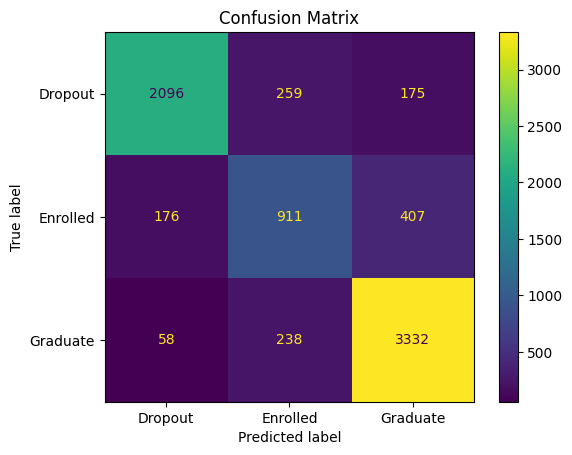

In [71]:
confusion_mat = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_mat, display_labels=lab_enc.classes_.tolist()).plot()
plt.title("Confusion Matrix")
plt.show()

# 🔮 Prediction

In [72]:
vtg_pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('cat',
                                               <catboost.core.CatBoostClassifier object at 0x7c44ad2cbcd0>),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device='cuda',
                                                             early_stopping_rounds=None,
                                                             enable_cate...
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('lgb',
                                               LGBMClassifier(device='cpu',
                                                              random_state=42,
                                                              verbose=-1)),
                                              ('hgb',
                                               HistGradientBoostingClassifier(random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [73]:
test_pred = vtg_pipe.predict(test)

In [74]:
sub = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
sub[target] = lab_enc.inverse_transform(test_pred)

In [75]:
sub

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

In [77]:
sub.to_csv("submission_2.csv", index=False)

<p><center style="color:#159364; font-family:cursive; font-size:20px; font-weight:600">Thanks for visiting my notebook. If you enjoyed The Notebook, I kindly request that you consider upvoting to provide me with further motivation to create additional works of similar nature in the future. </center></p>

<center><img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExaTVnem5oNHNzeGxsb2F6bXpicHl0MmszeWUyNmlwa3FjOWg5bmVkciZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/fzftvvUExTke50rIjy/giphy.gif"></center>